In [1]:
#Library Import

In [80]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,cohen_kappa_score
import pandas as pd

In [ ]:
#Data Load

In [81]:
url='E:/MCA SEM -2/ML WITH PYTHON/Dataset/Reddit/reddit.csv'
data=pd.read_csv(url)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6800\2606219255.py:2: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,34,35,37,38,39,41,45,46,47,51,57,59,62,63,64,65,66,67,70,71,72,73,74,76,78,79,80,82,84,85,87,88,89,90,95,96,97,98,99,100,101,102,103,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(url)


In [82]:
data.shape

(1048575, 109)

In [ ]:
#Drop Colum

In [83]:
data=data.drop(["all_awardings","author_flair_richtext","author_flair_text","author_fullname","awarders",
                "created_utc","full_link","gildings","id","link_flair_background_color","link_flair_richtext",
               "over_18","parent_whitelist_status","permalink","preview","retrieved_on","selftext","subreddit",
               "subreddit_id","thumbnail","thumbnail_height","thumbnail_width","title","total_awards_received","treatment_tags",
               "treatment_tags","url","whitelist_status","created","link_flair_template_id","author_flair_template_id",
                "author_flair_text_color","author_flair_background_color","media","media_embed","secure_media",
                "secure_media_embed","author_cakeday","banned_by","poll_data","edited","media_metadata","gilded","distinguished",
               "suggested_sort","discussion_type","event_end","event_is_live","event_start","steward_reports","removed_by",
               "updated_utc","og_description","og_title","crosspost_parent","crosspost_parent_list","author_created_utc",
                "category","content_categories","removal_reason","archived","can_gild","hidden","quarantine","subreddit_name_prefixed","rte_mode",
                "author_id","brand_safe","previous_visits","approved_at_utc","banned_at_utc","view_count","mod_reports","user_reports"],axis=1)

In [84]:
data.shape

(1048575, 36)

In [86]:
data.isnull().sum()

allow_live_comments        905969
author                        147
author_flair_css_class     989097
author_flair_type          631667
author_patreon_flair       768600
author_premium             977847
can_mod_post               493921
contest_mode               370253
domain                        167
is_crosspostable           533733
is_meta                    724641
is_original_content        669926
is_reddit_media_domain     559853
is_robot_indexable         759631
is_self                       169
is_video                   474222
link_flair_text_color      624268
link_flair_type            624268
locked                     250952
media_only                 694215
no_follow                  649542
num_comments                  169
num_crossposts             533736
pinned                     555607
post_hint                  782363
pwls                       682340
removed_by_category       1026644
score                         169
send_replies               648935
spoiler       

In [87]:
data['allow_live_comments'].describe()
data.head(5)

,allow_live_comments,author,author_flair_css_class,author_flair_type,author_patreon_flair,author_premium,can_mod_post,contest_mode,domain,is_crosspostable,...,removed_by_category,score,send_replies,spoiler,stickied,subreddit_subscribers,subreddit_type,wls,link_flair_css_class,link_flair_text
0,False,vicSaitamaPrime,NaN,text,False,False,False,False,i.redd.it,False,...,moderator,1.0,True,False,False,322320.0,public,6.0,NaN,NaN
1,False,pkmcreation,NaN,text,False,False,False,False,pkmcreation.com,False,...,reddit,1.0,True,False,False,322320.0,public,6.0,Non-Political,Non-Political
2,False,BigBulkemails,NaN,text,False,False,False,False,self.india,True,...,NaN,1.0,True,False,False,322320.0,public,6.0,Politics,Politics
3,False,Ib90,NaN,text,False,False,False,False,indiatoday.in,True,...,NaN,1.0,True,False,False,322319.0,public,6.0,Politics,Politics
4,False,sleepygamer92,universe,richtext,False,False,False,False,scroll.in,True,...,NaN,1.0,True,False,False,322319.0,public,6.0,Coronavirus,Coronavirus


In [88]:
data['allow_live_comments'].fillna(value="TRUE",inplace=True)

In [89]:
data['author_flair_css_class'].describe()
data['author_flair_css_class'].fillna(value="Gujrat",inplace=True)

In [90]:
data['author_flair_type'].describe()
data['author_flair_type'].fillna(value="richtext",inplace=True)

In [91]:
data['author_patreon_flair'].describe()
data['author_patreon_flair'].fillna(value="TRUE",inplace=True)

In [92]:
data['author_premium'].describe()
data['author_premium'].fillna(value="TRUE",inplace=True)

In [93]:
data['can_mod_post'].describe()
data['can_mod_post'].fillna(value="TRUE",inplace=True)

In [94]:
data['contest_mode'].describe()
data['contest_mode'].fillna(value="TRUE",inplace=True)

In [95]:
data['is_crosspostable'].describe()
data['is_crosspostable'].fillna(value="FALSE",inplace=True)

In [96]:
data['is_meta'].describe()
data['is_meta'].fillna(value="TRUE",inplace=True)

In [97]:
data['is_original_content'].describe()
data['is_original_content'].fillna(value="FALSE",inplace=True)

In [98]:
data['is_reddit_media_domain'].describe()
data['is_reddit_media_domain'].fillna(value="No",inplace=True)

In [99]:
data['is_robot_indexable'].describe()
data['is_robot_indexable'].fillna(value="FALSE",inplace=True)

In [100]:
data['is_video'].max()
data['is_video'].fillna(value="FALSE",inplace=True)

In [101]:
data['link_flair_text_color'].describe()
data['link_flair_text_color'].fillna(value="light",inplace=True)

In [102]:
data['link_flair_type'].describe()
data['link_flair_type'].fillna(value="text",inplace=True)

In [103]:
data['locked'].describe()
maxiumrepeat=data['locked'].value_counts().idxmax()
data['locked'].fillna(value="TRUE",inplace=True)

In [104]:
data['media_only'].describe()
data['media_only'].fillna(value="TRUE",inplace=True)

In [105]:
data['no_follow'].describe()
maxiumrepeat=data['no_follow'].value_counts().idxmax()
data['no_follow'].fillna(value=maxiumrepeat,inplace=True)

In [106]:
data['num_crossposts'].describe()
maxiumrepeat=data['num_crossposts'].value_counts().idxmax()
data['num_crossposts'].fillna(value=1,inplace=True)

In [107]:
data['pinned'].describe()
#maxiumrepeat=data['num_crossposts'].value_counts().idxmax()
data['pinned'].fillna(value="TRUE",inplace=True)

In [108]:
data['post_hint'].describe()
maxiumrepeat=data['post_hint'].value_counts().idxmax()
maxiumrepeat
data['post_hint'].fillna(value=maxiumrepeat,inplace=True)

In [109]:
data['pwls'].describe()
maxiumrepeat=data['pwls'].value_counts().idxmax()
maxiumrepeat
data['pwls'].fillna(value=5,inplace=True)

In [110]:
data['removed_by_category'].describe()
maxiumrepeat=data['removed_by_category'].value_counts().idxmax()
maxiumrepeat
data['removed_by_category'].fillna(value=maxiumrepeat,inplace=True)

In [111]:
data['send_replies'].describe()
#maxiumrepeat=data['removed_by_category'].value_counts().idxmax()
#maxiumrepeat
data['send_replies'].fillna(value="TRUE",inplace=True)

In [112]:
data['spoiler'].describe()
#maxiumrepeat=data['removed_by_category'].value_counts().idxmax()
#maxiumrepeat
data['spoiler'].fillna(value="TRUE",inplace=True)

In [113]:
data['stickied'].describe()
#maxiumrepeat=data['removed_by_category'].value_counts().idxmax()
#maxiumrepeat
data['stickied'].fillna(value="TRUE",inplace=True)

In [114]:
meanvalue=data['subreddit_subscribers'].mean().astype('int')
meanvalue

203347

In [115]:
data['subreddit_subscribers'].describe()
#meanvalue=data['subreddit_subscribers'].mean().astype('int')
data['subreddit_subscribers'].fillna(value=meanvalue,inplace=True)

In [116]:
data['subreddit_subscribers'].describe()

count    1.048575e+06
mean     2.033473e+05
std      3.602161e+04
min      1.150310e+05
25%      2.033470e+05
50%      2.033470e+05
75%      2.033470e+05
max      3.223200e+05
Name: subreddit_subscribers, dtype: float64

In [117]:
data['subreddit_type'].describe()
#maxiumrepeat=data['removed_by_category'].value_counts().idxmax()
#maxiumrepeat
data['subreddit_type'].fillna(value="private",inplace=True)

In [118]:
data['wls'].describe()
maxiumrepeat=data['wls'].value_counts().idxmax()
maxiumrepeat
data['wls'].fillna(value=5,inplace=True)

In [119]:
data['link_flair_css_class'].describe()
maxiumrepeat=data['link_flair_css_class'].value_counts().idxmax()
maxiumrepeat
data['link_flair_css_class'].fillna(value=maxiumrepeat,inplace=True)

In [120]:
data['link_flair_text'].describe()
maxiumrepeat=data['link_flair_text'].value_counts().idxmax()
maxiumrepeat
data['link_flair_text'].fillna(value=maxiumrepeat,inplace=True)

In [121]:
data['score'].describe()
maxiumrepeat=data['score'].value_counts().idxmax()
maxiumrepeat
data['score'].fillna(value=0,inplace=True)

In [122]:
data['num_comments'].describe()
maxiumrepeat=data['num_comments'].value_counts().idxmax()
maxiumrepeat
data['num_comments'].fillna(value=1,inplace=True)

In [123]:
data.isnull().sum()

allow_live_comments         0
author                    147
author_flair_css_class      0
author_flair_type           0
author_patreon_flair        0
author_premium              0
can_mod_post                0
contest_mode                0
domain                    167
is_crosspostable            0
is_meta                     0
is_original_content         0
is_reddit_media_domain      0
is_robot_indexable          0
is_self                   169
is_video                    0
link_flair_text_color       0
link_flair_type             0
locked                      0
media_only                  0
no_follow                   0
num_comments                0
num_crossposts              0
pinned                      0
post_hint                   0
pwls                        0
removed_by_category         0
score                       0
send_replies                0
spoiler                     0
stickied                    0
subreddit_subscribers       0
subreddit_type              0
wls       

In [124]:
data=data.drop(["author","domain","is_self","media_only"],axis=1)

In [125]:
data.isnull().sum()

allow_live_comments       0
author_flair_css_class    0
author_flair_type         0
author_patreon_flair      0
author_premium            0
can_mod_post              0
contest_mode              0
is_crosspostable          0
is_meta                   0
is_original_content       0
is_reddit_media_domain    0
is_robot_indexable        0
is_video                  0
link_flair_text_color     0
link_flair_type           0
locked                    0
no_follow                 0
num_comments              0
num_crossposts            0
pinned                    0
post_hint                 0
pwls                      0
removed_by_category       0
score                     0
send_replies              0
spoiler                   0
stickied                  0
subreddit_subscribers     0
subreddit_type            0
wls                       0
link_flair_css_class      0
link_flair_text           0
dtype: int64

In [126]:
reditclass_mapper = {"Yes":1,"No":0}
data["is_reddit_media_domain"] = data["is_reddit_media_domain"].replace(reditclass_mapper)
data["is_reddit_media_domain"].head(5)

0    0
1    1
2    1
3    1
4    1
Name: is_reddit_media_domain, dtype: object

In [127]:
data.rename(columns = {'is_reddit_media_domain':'Reddit_Media'}, inplace = True)
#data.author_premium = data.author_premium.replace({True: 1, False: 0})
#data['Reddit_Media'].head(5)

In [128]:
#data.is_original_content = data.is_original_content.replace({True: 1, False: 0})

In [129]:
data.rename(columns = {'pwls':'Up_Reach'}, inplace = True)
data.rename(columns = {'wls':'Down_Reach'}, inplace = True)


In [130]:
data2=data[["Reddit_Media","subreddit_subscribers","score","num_comments","num_crossposts","Up_Reach","Down_Reach"]]

In [131]:
data2.head(5)

,Reddit_Media,subreddit_subscribers,score,num_comments,num_crossposts,Up_Reach,Down_Reach
0,0,322320.0,1.0,0.0,0.0,6.0,6.0
1,1,322320.0,1.0,0.0,0.0,6.0,6.0
2,1,322320.0,1.0,1.0,0.0,6.0,6.0
3,1,322319.0,1.0,0.0,0.0,6.0,6.0
4,1,322319.0,1.0,0.0,0.0,6.0,6.0


In [132]:
#Train And Test Divide

In [133]:
x = data2.iloc[:100000,1:7].values
y = data2.iloc[:100000, 0].values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [134]:
#KFold Cross Validation

In [135]:
koldcross=KFold(n_splits=10,random_state=None,shuffle=False)
print(koldcross)

KFold(n_splits=10, random_state=None, shuffle=False)


In [136]:
for train_index,test_index in koldcross.split(x,y):        #fold cross validation
    xtrain,xtest=x[train_index],x[test_index]
    ytrain,ytest=y[train_index],y[test_index]
    print(xtrain)
    print(ytrain) 

[[3.13725e+05 1.00000e+00 2.40400e+03 0.00000e+00 6.00000e+00 6.00000e+00]
 [3.13724e+05 1.00000e+00 0.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [3.13724e+05 1.00000e+00 0.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 ...
 [2.52497e+05 3.00000e+00 0.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [2.52497e+05 2.50000e+01 1.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [2.52497e+05 4.00000e+00 1.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]]
[1 0 0 ... 1 1 1]
[[3.22320e+05 1.00000e+00 0.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [3.22320e+05 1.00000e+00 0.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [3.22320e+05 1.00000e+00 1.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 ...
 [2.52497e+05 3.00000e+00 0.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [2.52497e+05 2.50000e+01 1.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [2.52497e+05 4.00000e+00 1.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]]
[0 1 1 ... 1 1 1]
[[3.22320e+05 1.00000e+00 0.00000e+00 0.00000e+00 6.

In [137]:
#Bootstrap sampling

In [138]:
xsample,ysample=resample(x,y,replace=True,n_samples=None,random_state=0) 

In [139]:
print(xsample)
print(ysample)

[[2.70893e+05 1.00000e+00 0.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [2.86733e+05 1.00000e+00 2.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [2.87249e+05 1.00000e+00 2.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 ...
 [2.90815e+05 1.00000e+00 1.70000e+01 0.00000e+00 6.00000e+00 6.00000e+00]
 [2.75509e+05 1.00000e+00 0.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]
 [2.74145e+05 1.00000e+00 3.00000e+00 0.00000e+00 6.00000e+00 6.00000e+00]]
[1 1 1 ... 1 1 1]


In [140]:
#Classfication Model

In [141]:
def classify_report(ytest,y_pred):
        cm = confusion_matrix(ytest, y_pred)
        print ("Confusion Matrix : \n", cm)
        error_rate = 1 - accuracy_score(ytest, y_pred)
        print ("Classification Report:\n")
        print(classification_report(ytest,y_pred))
        print("Accuracy: \n", accuracy_score(ytest, y_pred))
        print("Error Rate: \n",error_rate )
        print("Kappa Score: \n", cohen_kappa_score(ytest, y_pred))

In [142]:
ytrain.shape
xtrain.shape

(90000, 6)

In [143]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
x = data2.iloc[:100000,1:7].astype('int')
y = data2.iloc[:100000, 0].astype('int')
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)
xsample,ysample=resample(x,y,replace=True,n_samples=None,random_state=0) 
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
y_pred_nb = gnb.predict(xtest)
classify_report(ytest,y_pred_nb)

Confusion Matrix : 
 [[   79  5146]
 [  229 24546]]
Classification Report:

              precision    recall  f1-score   support

           0       0.26      0.02      0.03      5225
           1       0.83      0.99      0.90     24775

    accuracy                           0.82     30000
   macro avg       0.54      0.50      0.46     30000
weighted avg       0.73      0.82      0.75     30000

Accuracy: 
 0.8208333333333333
Error Rate: 
 0.1791666666666667
Kappa Score: 
 0.009346850859549005


In [144]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

In [145]:
tpr,fpr,thersholds=roc_curve(ytest,y_pred_nb,pos_label=1,drop_intermediate=False)
auc_score_nb=roc_auc_score(ytest,y_pred_nb)
print(auc_score_nb)

0.5029382142632979


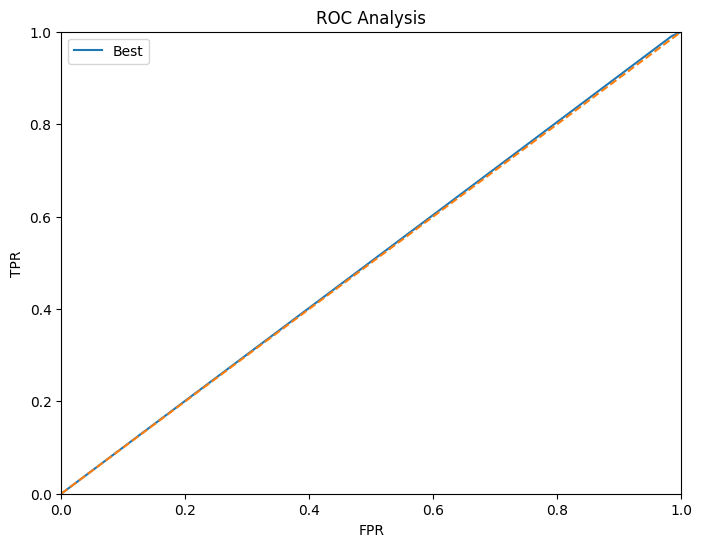

In [146]:
fig=plt.figure(figsize=(8,6))
plt.plot(tpr,fpr,label="NB %2f"%auc_score_nb)
plt.legend(['Best'])
plt.plot([0,1],[0,1],'--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Analysis')
plt.show()

In [147]:
from sklearn import tree
#from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
x = data2.iloc[:100000,1:7].astype('int')
y = data2.iloc[:100000, 0].astype('int')
# decision tree model creation
dtc = tree.DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
# predictions
y_pred_dtc = dtc.predict(xtest)
classify_report(ytest,y_pred_dtc)

Confusion Matrix : 
 [[ 1374  3851]
 [ 4319 20456]]
Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.26      0.25      5225
           1       0.84      0.83      0.83     24775

    accuracy                           0.73     30000
   macro avg       0.54      0.54      0.54     30000
weighted avg       0.74      0.73      0.73     30000

Accuracy: 
 0.7276666666666667
Error Rate: 
 0.2723333333333333
Kappa Score: 
 0.08561204395553557


In [148]:
tpr,fpr,thersholds=roc_curve(ytest,y_pred_dtc,pos_label=1,drop_intermediate=False)
auc_score_dtc=roc_auc_score(ytest,y_pred_dtc)
print(auc_score_dtc)

0.5443187732656106


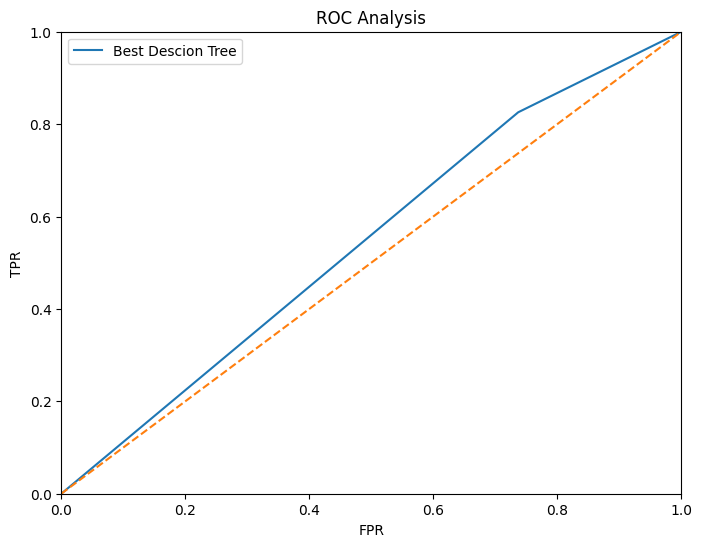

In [152]:
fig=plt.figure(figsize=(8,6))
plt.plot(tpr,fpr,label="NB %2f"%auc_score_dtc)
plt.legend(['Best Descion Tree'])
plt.plot([0,1],[0,1],'--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Analysis')
plt.show()   #M

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x = data2.iloc[:1000,1:7].astype('int')
y = data2.iloc[:1000, 0].astype('int')
# decision tree model creation
knn = KNeighborsClassifier(n_neighbors=10)
#Fit a model
knn.fit(xtrain,ytrain)
# Perform predictions
y_pred_knn = knn.predict(xtest)
#Classification report
classify_report(ytest,y_pred_knn)

Confusion Matrix : 
 [[  389  4836]
 [  940 23835]]
Classification Report:

              precision    recall  f1-score   support

           0       0.29      0.07      0.12      5225
           1       0.83      0.96      0.89     24775

    accuracy                           0.81     30000
   macro avg       0.56      0.52      0.51     30000
weighted avg       0.74      0.81      0.76     30000

Accuracy: 
 0.8074666666666667
Error Rate: 
 0.19253333333333333
Kappa Score: 
 0.05172576552704666


In [153]:
tpr,fpr,thersholds=roc_curve(ytest,y_pred_knn,pos_label=1,drop_intermediate=False)
auc_score_knn=roc_auc_score(ytest,y_pred_knn)
print(auc_score_knn)

0.5182541437531081


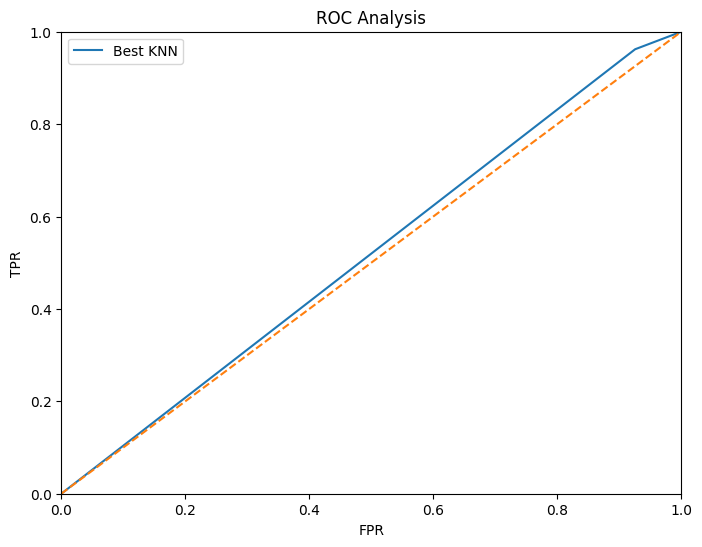

In [154]:
fig=plt.figure(figsize=(8,6))
plt.plot(tpr,fpr,label="NB %2f"%auc_score_knn)
plt.legend(['Best KNN'])
plt.plot([0,1],[0,1],'--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Analysis')
plt.show()

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x = data2.iloc[:1000,1:7].astype('int')
y = data2.iloc[:1000, 0].astype('int')
# random forest model creation
rfc = RandomForestClassifier(n_estimators=5)
#Fit the model
rfc.fit(xtrain,ytrain)
#Perform predictions
y_pred_rfc = rfc.predict(xtest)
#Classification report
classify_report(ytest,y_pred_rfc)

Confusion Matrix : 
 [[ 1114  4111]
 [ 3290 21485]]
Classification Report:

              precision    recall  f1-score   support

           0       0.25      0.21      0.23      5225
           1       0.84      0.87      0.85     24775

    accuracy                           0.75     30000
   macro avg       0.55      0.54      0.54     30000
weighted avg       0.74      0.75      0.74     30000

Accuracy: 
 0.7533
Error Rate: 
 0.24670000000000003
Kappa Score: 
 0.08572515670282921


In [156]:
tpr,fpr,thersholds=roc_curve(ytest,y_pred_rfc,pos_label=1,drop_intermediate=False)
auc_score_rfc=roc_auc_score(ytest,y_pred_rfc)
print(auc_score_rfc)

0.5402052926095626


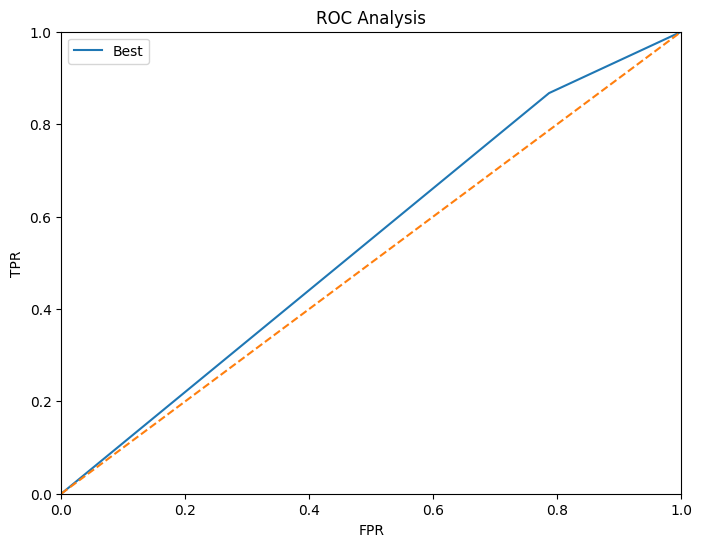

In [157]:
fig=plt.figure(figsize=(8,6))
plt.plot(tpr,fpr,label="NB %2f"%auc_score_rfc)
plt.legend(['Best'])
plt.plot([0,1],[0,1],'--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Analysis')
plt.show()    #H

In [158]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x = data2.iloc[:1000,1:7].astype('int')
y = data2.iloc[:1000, 0].astype('int')
svclassifier = SVC()
svclassifier.fit(xtrain, ytrain)
y_pred_svm = svclassifier.predict(xtest)
classify_report(ytest,y_pred_svm)

Confusion Matrix : 
 [[    0  5225]
 [    0 24775]]
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5225
           1       0.83      1.00      0.90     24775

    accuracy                           0.83     30000
   macro avg       0.41      0.50      0.45     30000
weighted avg       0.68      0.83      0.75     30000

Accuracy: 
 0.8258333333333333
Error Rate: 
 0.1741666666666667
Kappa Score: 
 0.0


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
tpr,fpr,thersholds=roc_curve(ytest,y_pred_svm,pos_label=1,drop_intermediate=False)
auc_score_svm=roc_auc_score(ytest,y_pred_svm)
print(auc_score_svm)

0.5


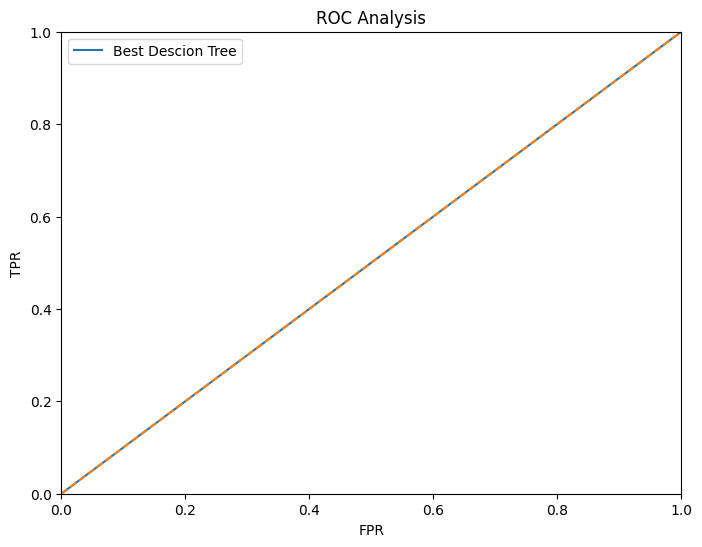

In [160]:
fig=plt.figure(figsize=(8,6))
plt.plot(tpr,fpr,label="NB %2f"%auc_score_svm)
plt.legend(['Best Descion Tree'])
plt.plot([0,1],[0,1],'--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Analysis')
plt.show()     

In [166]:
data3=data[["subreddit_subscribers","score","num_comments","num_crossposts","Up_Reach","Down_Reach"]]

In [167]:
data3.head(5)

,subreddit_subscribers,score,num_comments,num_crossposts,Up_Reach,Down_Reach
0,322320.0,1.0,0.0,0.0,6.0,6.0
1,322320.0,1.0,0.0,0.0,6.0,6.0
2,322320.0,1.0,1.0,0.0,6.0,6.0
3,322319.0,1.0,0.0,0.0,6.0,6.0
4,322319.0,1.0,0.0,0.0,6.0,6.0


In [172]:
from sklearn.cluster import KMeans
clusters = KMeans(2)
#Compute k-means clustering.
clusters.fit_predict(data3)
data3["clusterid"] = clusters.labels_
data3[0:30]

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_6800\1921192299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["clusterid"] = clusters.labels_


,subreddit_subscribers,score,num_comments,num_crossposts,Up_Reach,Down_Reach,clusterid
0,322320.0,1.0,0.0,0.0,6.0,6.0,1
1,322320.0,1.0,0.0,0.0,6.0,6.0,1
2,322320.0,1.0,1.0,0.0,6.0,6.0,1
3,322319.0,1.0,0.0,0.0,6.0,6.0,1
4,322319.0,1.0,0.0,0.0,6.0,6.0,1
5,322320.0,1.0,0.0,0.0,6.0,6.0,1
6,322319.0,1.0,0.0,0.0,6.0,6.0,1
7,322318.0,1.0,0.0,0.0,6.0,6.0,1
8,322318.0,1.0,0.0,0.0,6.0,6.0,1
9,322317.0,1.0,0.0,0.0,6.0,6.0,1


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

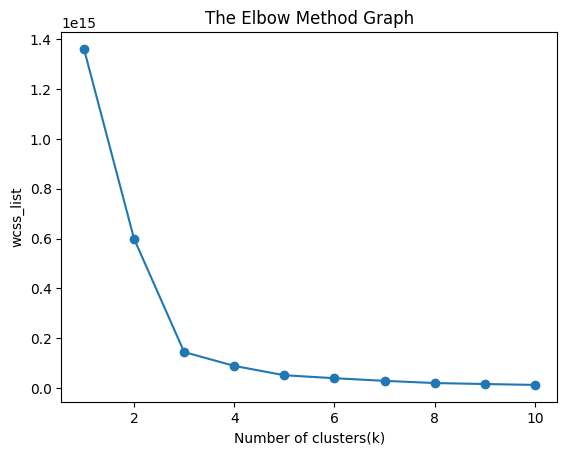

In [170]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss_list= [] #Initializing the list for the values of WCSS
#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 0)
    kmeans.fit(data3)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list,marker="o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_6800\3574268028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['cluster'] = kmeans.fit_predict(data3[['Up_Reach','Down_Reach']])
C:\Users\DELL\AppData\Local\Temp\ipykernel_6800\3574268028.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

[[5.00233510e+00 4.99674227e+00]
 [6.59916566e-13 1.82076576e-13]
 [5.99992489e+00 6.00000000e+00]]
   subreddit_subscribers  score  num_comments  num_crossposts  Up_Reach  \
1               322320.0    1.0           0.0             0.0       6.0   
2               322320.0    1.0           1.0             0.0       6.0   
3               322319.0    1.0           0.0             0.0       6.0   
4               322319.0    1.0           0.0             0.0       6.0   
5               322320.0    1.0           0.0             0.0       6.0   
6               322319.0    1.0           0.0             0.0       6.0   
7               322318.0    1.0           0.0             0.0       6.0   
8               322318.0    1.0           0.0             0.0       6.0   
9               322317.0    1.0           0.0             0.0       6.0   

   Down_Reach  clusterid  cluster     cen_x  cen_y      c  
1         6.0          1        2  5.999925    6.0  brown  
2         6.0          1     

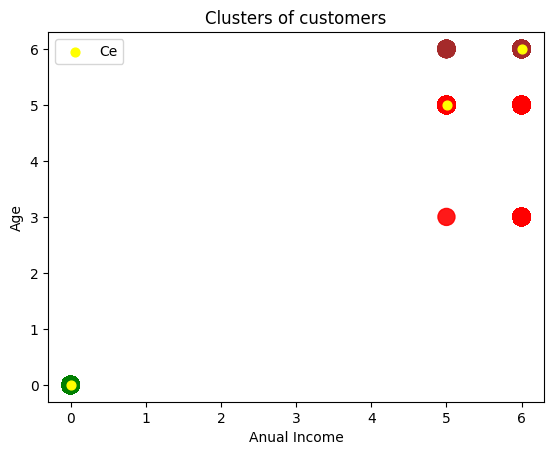

In [174]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# k means
kmeans = KMeans(3)
#Compute cluster centers and predict cluster index for each sample.
data3['cluster'] = kmeans.fit_predict(data3[['Up_Reach','Down_Reach']])
# get centroids
centroids = kmeans.cluster_centers_
print(centroids)
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
# add to df
data3['cen_x'] = data3.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data3['cen_y'] = data3.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['red', 'green', 'brown']
data3['c'] = data3.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
print(data3[1:10])
plt.scatter(data3.Up_Reach, data3.Down_Reach, c=data3.c, alpha = 0.9, s=150)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s = 40, c = 'yellow', label = 'Ce')
plt.title('Clusters of customers')
plt.xlabel('Anual Income')
plt.ylabel('Age')
plt.rcParams["figure.figsize"] = (15,3)
plt.legend()
plt.show()

In [177]:
#Linear Regression

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [180]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [183]:
x = data2.iloc[:1000,1:7].astype('int')
y = data2.iloc[:1000, 0].astype('int')
# decision tree model creation
lr = LinearRegression()
#Fit a model
lr.fit(xtrain,ytrain)
# Perform predictions
y_pred_linear = lr.predict(xtest)
#Classification report
mse = mean_squared_error(ytest, y_pred_linear)
print("Mean squared error:", mse)

Mean squared error: 0.12450251392906102


In [184]:
#Logistic Regreesion

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [186]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [187]:
x = data2.iloc[:1000,1:7].astype('int')
y = data2.iloc[:1000, 0].astype('int')
# decision tree model creation
logics = LogisticRegression()
#Fit a model
logics.fit(xtrain,ytrain)
# Perform predictions
y_pred_logistic = logics.predict(xtest)
#Classification report
acc = accuracy_score(ytest, y_pred_logistic)
print("Accuracy:", acc)
print("Classification Report:")
print(classification_report(ytest, y_pred_logistic))

Accuracy: 0.02
Classification Report:
              precision    recall  f1-score   support

      321467       0.00      0.00      0.00         2
      321469       0.00      0.00      0.00         1
      321476       0.00      0.00      0.00         1
      321477       0.00      0.00      0.00         2
      321478       0.00      0.00      0.00         1
      321480       0.00      0.00      0.00         1
      321482       0.00      0.00      0.00         1
      321483       0.00      0.00      0.00         1
      321487       0.00      0.00      0.00         1
      321491       0.00      0.00      0.00         1
      321494       0.00      0.00      0.00         1
      321497       0.00      0.00      0.00         1
      321503       0.00      0.00      0.00         2
      321508       0.00      0.00      0.00         1
      321515       0.00      0.00      0.00         3
      321517       0.00      0.00      0.00         1
      321525       0.00      0.00      0.00

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall an